In [ ]:
#@title Install dependencies

!git clone https://github.com/NVlabs/stylegan2-ada-pytorch
%cd stylegan2-ada-pytorch
!pip install torch==1.7.1+cu110 torchvision==0.8.2+cu110 torchaudio===0.7.2 -f https://download.pytorch.org/whl/torc...
!pip install click requests ninja imageio imageio-ffmpeg tqdm psutil scipy pyspng
!pip install git+https://github.com/openai/CLIP.git
!pip install kmeans-pytorch

!add-apt-repository ppa:stebbins/handbrake-releases -y 
!apt-get install -y handbrake-cli 

In [3]:
#@title Download projector_clip.py and the model

import os

if not os.path.exists('projector_clip.py'):
  !wget https://gist.githubusercontent.com/pbaylies/671ef8434fd11f056bab4330e0e7c365/raw/f5306a51fc404b326607c317059731808ea14b1c/projector_clip.py
if not os.path.exists('parrots_512_pytorch.pkl'):
  !wget https://storage.googleapis.com/self-distilled-stylegan/parrots_512_pytorch.pkl


In [12]:
#@title
def GenSingleImage(additional_text, index, max, output, prompt, kmeans, learning_rate, steps, network, suffix, compress):
    print("\033[94mGenerating" + str(additional_text) + "image " + str(index) + "/" + str(max) + "\033[0m")
    !python projector_clip.py --outdir="$output" --target-text="$prompt" --kmeans=$kmeans --lr=$learning_rate --num-steps=$steps --network=$network
    !mv "{output}/proj.png" "{output}/{index}{suffix}.png"
    !mv "{output}/proj.mp4" "{output}/{index}{suffix}.mp4"
    print("Displaying image...")
    display(Image(path.normpath(str(output) + '/' + str(index) + str(suffix) + '.png')))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
rm: cannot remove '/content/drive/MyDrive/aaaAA/*': No such file or directory
Generating image 1/2
Loading networks from "parrots_512_pytorch.pkl"...
Computing W midpoint and stddev using 8192 samples...
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.
step    1/2: dist 3.48 loss 24569.46
step    2/2: dist 3.37 loss 27642.66
Elapsed: 7.1 s
Saving optimization progress video "/content/drive/MyDrive/aaaAA/proj.mp4"
Displaying image...


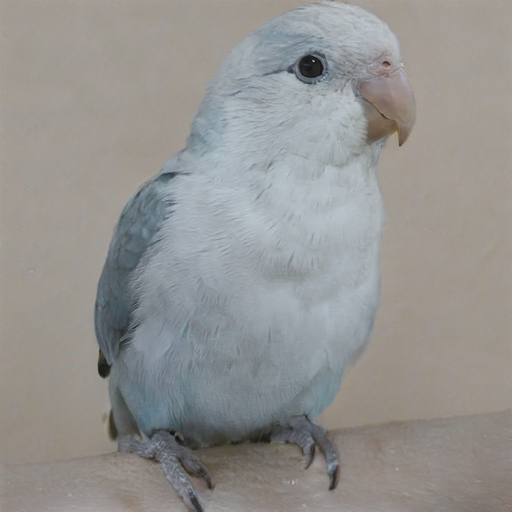

Generating (kmeans) image 1/2
Loading networks from "parrots_512_pytorch.pkl"...
Computing W midpoint and stddev using 8192 samples...
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.
step    1/2: dist 3.48 loss 24569.46
step    2/2: dist 3.37 loss 27642.66
Elapsed: 7.2 s
Saving optimization progress video "/content/drive/MyDrive/aaaAA/proj.mp4"
Displaying image...


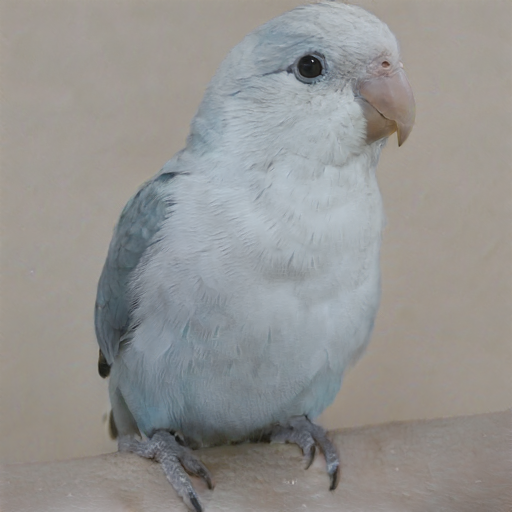

Generating image 2/2
Loading networks from "parrots_512_pytorch.pkl"...
Computing W midpoint and stddev using 8192 samples...
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.
step    1/2: dist 3.48 loss 24569.46
step    2/2: dist 3.37 loss 27642.66
Elapsed: 7.3 s
Saving optimization progress video "/content/drive/MyDrive/aaaAA/proj.mp4"
Displaying image...


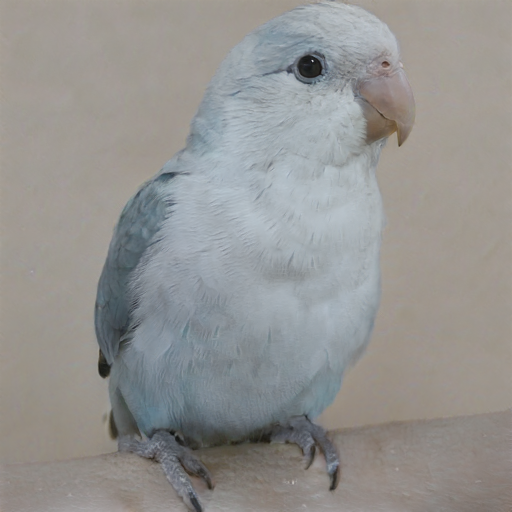

Generating (kmeans) image 2/2
Loading networks from "parrots_512_pytorch.pkl"...
Computing W midpoint and stddev using 8192 samples...
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.
step    1/2: dist 3.48 loss 24569.46
step    2/2: dist 3.37 loss 27642.66
Elapsed: 7.3 s
Saving optimization progress video "/content/drive/MyDrive/aaaAA/proj.mp4"
Displaying image...


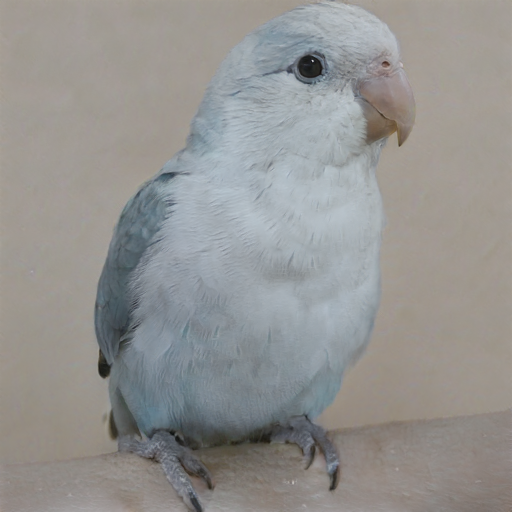

['/content/drive/MyDrive/aaaAA/1_.png', '/content/drive/MyDrive/aaaAA/1_k.png', '/content/drive/MyDrive/aaaAA/2_.png', '/content/drive/MyDrive/aaaAA/2_k.png']


In [17]:
#@title Configure and generate images

#@markdown Image generation
prompt = 'A pretty snow, frost and ice coloured budgie' #@param {type:"string"}
kmeans = 'Both' #@param ["Yes", "No", "Both"]
steps = 250 #@param {type:"integer"}
learning_rate = 0.025 #@param {type:"number"}

#@markdown Output settings:<br>(google drive can be accessed at '/content/drive/MyDrive')
output_location = '/content/out' #@param {type:"string"}
mount_google_drive = False #@param {type:"boolean"}
wipe_output_folder_at_start = True #@param {type:"boolean"}
number_of_images = 2 #@param {type:"integer"}
compress_videos = True #@param {type:"boolean"}

first_is_kmeans = (kmeans == 'Yes')
final_image_list = []
final_video_list = []


from IPython.display import Image, display
from os import path
from google.colab import drive

if mount_google_drive:
    drive.mount('/content/drive')

if wipe_output_folder_at_start:
    !rm $output_location/*

for x in range(1, number_of_images + 1):
    GenSingleImage(' ', x, number_of_images, output_location, prompt, first_is_kmeans, learning_rate, steps, "parrots_512_pytorch.pkl", "_", compress_videos)
    final_image_list += [path.normpath(str(output_location) + '/' + str(x) + '_.png')]
    final_video_list += [path.normpath(str(output_location) + '/' + str(x) + '_.mp4')]

    if (kmeans == 'Both'):
        GenSingleImage(" (kmeans) ", x, number_of_images, output_location, prompt, first_is_kmeans, learning_rate, steps, "parrots_512_pytorch.pkl", "_k", compress_videos)
        final_image_list += [path.normpath(str(output_location) + '/' + str(x) + '_k.png')]
        final_video_list += [path.normpath(str(output_location) + '/' + str(x) + '_k.mp4')]
    

print(final_image_list)